# Plots for the introduction

To help keep a consisten feel of plots and so on, this document will do any plots used.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

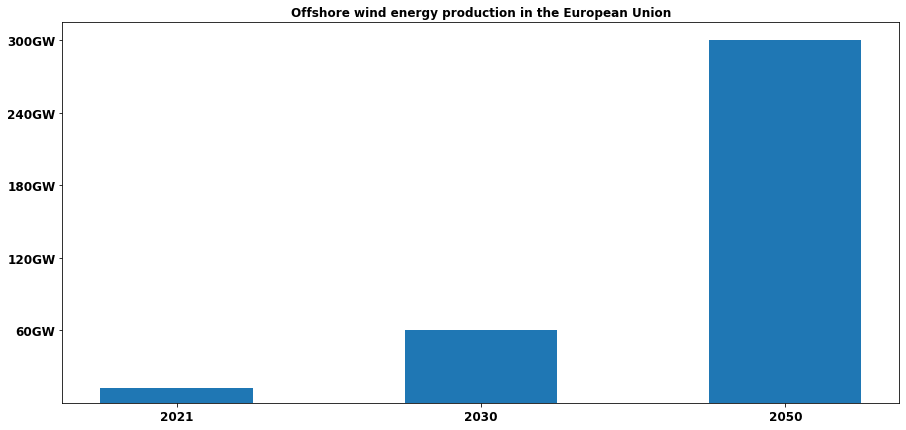

In [23]:
# Source is:
# https://ec.europa.eu/commission/presscorner/detail/en/ip_20_2096

year = np.array(["2021", "2030", "2050"])
gw = np.array([12, 60, 300])
gw_text = np.array(["12GW", "60GW", "300GW"])
gw_test = np.array(["60GW", "120GW","180GW","240GW","300GW"])
gw1 = np.array([60, 120, 180, 240, 300])

fig = plt.gcf()
fig.set_size_inches(15, 7)
ax = plt.gca()


plt.bar(year, gw, width=0.5)


#plt.xlabel("Year", fontsize = 12, fontweight="bold")
#plt.ylabel("Energy production [GW]", fontsize = 12, fontweight="bold")
plt.title("Offshore wind energy production in the European Union", fontsize = 12, fontweight="bold")
plt.yticks(gw1, gw_test, fontsize = 12, fontweight = "bold")
plt.xticks(fontsize = 12, fontweight = "bold")

plt.show()
fig.savefig('kap1/Energy_prod.png', dpi=150)

